## Notas de Alunos do IMD
### Análise sobre os dados

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)

imd = pd.read_excel('imd_notas.xlsx')

In [3]:
imd.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enen-nota
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado,618.0
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado,618.0
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado,615.0
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,600.0
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,673.0


In [4]:
imd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4842 entries, 0 to 4841
Data columns (total 11 columns):
a_ID                  4842 non-null int64
CEP                   4842 non-null int64
ano_ingresso          4842 non-null int64
periodo_ingresso      4842 non-null int64
status                4842 non-null object
ano_disciplina        4842 non-null int64
periodo_disciplina    4842 non-null int64
nota                  4842 non-null float64
disciplina_ID         4842 non-null int64
status.disciplina     4842 non-null object
enen-nota             4553 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 453.9+ KB


In [5]:
imd = imd.loc[~pd.isnull(imd['enen-nota'])]
imd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 0 to 4841
Data columns (total 11 columns):
a_ID                  4553 non-null int64
CEP                   4553 non-null int64
ano_ingresso          4553 non-null int64
periodo_ingresso      4553 non-null int64
status                4553 non-null object
ano_disciplina        4553 non-null int64
periodo_disciplina    4553 non-null int64
nota                  4553 non-null float64
disciplina_ID         4553 non-null int64
status.disciplina     4553 non-null object
enen-nota             4553 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 426.8+ KB


In [6]:
imd_ncancelado = imd.loc[~imd['status'].isin(['CANCELADO', 'TRANCADO'])]
imd_aprovados = imd.loc[imd['status.disciplina']=='Aprovado']
imd_enem2014 = imd[imd['ano_ingresso']==2014]['enen-nota']
imd_enem2015 = imd[imd['ano_ingresso']==2015]['enen-nota']
imd_enem2016 = imd[imd['ano_ingresso']==2016]['enen-nota']
print(imd_enem2014.count(), imd_enem2015.count(), imd_enem2016.count())
imd_enem = pd.DataFrame({'2014': np.random.choice(a=imd_enem2014, size=100), 
                         '2015': np.random.choice(a=imd_enem2015, size=100),
                         '2016': np.random.choice(a=imd_enem2016, size=100)})
imd_enem.head()

1542 1856 1155


,2014,2015,2016
0,630.0,616.0,656.0
1,630.0,620.0,594.0
2,622.0,663.0,694.0
3,651.0,612.0,649.0
4,698.0,655.0,630.0


In [7]:
imd_enem.describe()

,2014,2015,2016
count,100.000000,100.000000,100.000000
mean,647.410000,633.950000,650.830000
std,38.159181,47.120386,42.267081
min,542.000000,507.000000,513.000000
25%,622.000000,606.500000,623.000000
50%,644.500000,628.000000,649.500000
75%,667.250000,655.000000,672.250000
max,745.000000,748.000000,808.000000


### Distribuicão das Médias das amostras

In [8]:
lm2014 = []
lm2015 = []
lm2016 = []
for i in range(1000):
    mam2014 = np.mean(np.random.choice(a=imd_enem2014, size=100))
    mam2015 = np.mean(np.random.choice(a=imd_enem2015, size=100))
    mam2016 = np.mean(np.random.choice(a=imd_enem2016, size=100))
    lm2014.append(mam2014)
    lm2015.append(mam2015)
    lm2016.append(mam2016)
imd_enem_amostras = pd.DataFrame({'2014': lm2014, 
                                  '2015': lm2015,
                                  '2016': lm2016})
imd_enem_amostras.describe()

,2014,2015,2016
count,1000.000000,1000.000000,1000.000000
mean,645.939920,630.556620,644.335460
std,4.385266,4.602642,4.098622
min,633.580000,615.990000,632.440000
25%,642.832500,627.437500,641.857500
50%,645.955000,630.490000,644.245000
75%,649.130000,633.585000,647.080000
max,659.740000,643.890000,658.520000


(array([  4.,  12.,  17.,  24.,  45.,  47.,  82., 122., 144., 110., 116.,
         97.,  69.,  48.,  35.,  17.,   7.,   3.,   0.,   1.]),
 array([632.44 , 633.744, 635.048, 636.352, 637.656, 638.96 , 640.264,
        641.568, 642.872, 644.176, 645.48 , 646.784, 648.088, 649.392,
        650.696, 652.   , 653.304, 654.608, 655.912, 657.216, 658.52 ]),
 <a list of 20 Patch objects>)

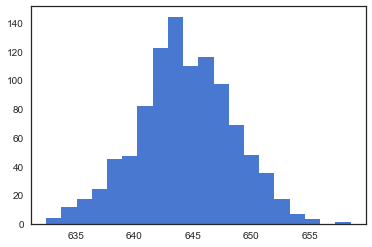

In [9]:
ax = plt.subplot()
ax.hist(imd_enem_amostras['2016'], bins=20)

### Notas do ENEN

### Correlação entre os atributos

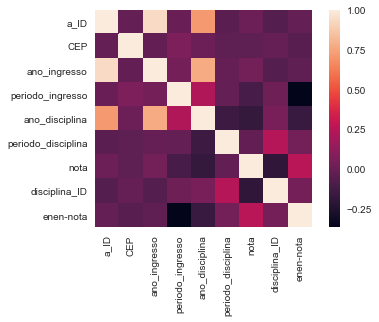

In [10]:
imd_corr = imd.corr()
ax = plt.subplot()
sns.heatmap(imd_corr, square=True)

### Histograma de distribuição Normal

#### Média da nota do ENEM dos alunos do IMD 

In [11]:
imd_enem_media_geral = imd['enen-nota'].mean().mean()
print('Média Geral IMD ENEM = {0:.4f}'.format(imd_enem_media_geral))

Média Geral IMD ENEM = 639.3363


In [25]:
data = imd_enem_amostras['2016']

### Normality Test

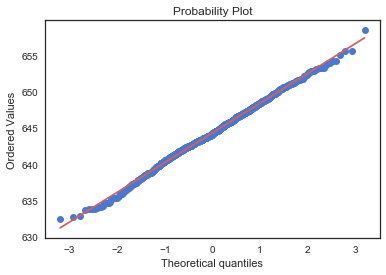

In [16]:
import numpy.random as random

stats.probplot(data, dist="norm", plot=plt)
norm=random.normal(0,2,len(data))
norm.sort()
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.show()

### Confidence Interval

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a distribution with a parameter $\Theta$ that is to be estimated. An interval estimator with confidence level $1−\alpha$ consists of two estimators $\hat{\Theta_l}(X_1,X_2, ..., X_n)$ and $\hat{\Theta_h}(X_1,X_2, ..., X_n)$ such that

$$
\begin{equation}
P\bigg(\hat{\Theta_l} \leq \theta  \, \textrm{and} \, \hat{\Theta_h} \geq \theta \bigg) \geq 1-\alpha,
\end{equation}
$$

for every possible value of $\Theta$. Equivalently, we say that $[\hat{\Theta_l}, \hat{\Theta_h}]$ is a $(1−\alpha)100\%$ confidence interval for $\Theta$. 

#### Para estimar a média, utiliza-se t-student:

Assumptions: A random sample $X_1, X_2, X_3, ..., X_n$ is given from a $N(\mu ,\sigma^{2})$ distribution, where $\mu = EX_{i}$ and $Var(X_{i}) = \sigma^{2}$ are unknown.

Parameter to be Estimated: $\mu = EXi$.

Confidence Interval: $\left[\overline{X}- z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} , \overline{X}+ z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right]$ is a $(1−\alpha)$ confidence interval for $\mu$. 

In [51]:
import math

data = imd_enem['2015']
alpha = 0.05
mean, sigma = data.mean(), data.std(ddof=1)
print('Mean= {0:.4f}, Sigma= {1:.4f}'.format(mean,sigma))
inf, sup = stats.norm.interval((1-alpha), loc=mean, scale=sigma/math.sqrt(len(data)))
#inf, sup = stats.t.interval((1-alpha), loc=mean, scale=sigma/math.sqrt(len(data)), df=99)
print('Estimativa da média das notas do ENEM dos ingressante no IMD')
print('Com intervalo de confiaça de {0:.1f}% está entre:'.format(100*(1-alpha)))
print('Limite inferior={0:.4f}, Limite superior={1:.4f}'.format(inf,sup))

Mean= 633.9500, Sigma= 47.1204
Estimativa da média das notas do ENEM dos ingressante no IMD
Com intervalo de confiaça de 95.0% está entre:
Limite inferior=624.7146, Limite superior=643.1854


In [52]:
#print('Quant. abaixo do Limite Inf: {}'.format(data.loc[data<inf].count()))
#print('Quant. acima do Limite Sup: {}'.format(data.loc[data>sup].count()))

### Hyphoteses Test



#### H0: A média do Enem de uma amostra de 2016 é igual a média geral

In [53]:
stats.ttest_1samp(a = data, popmean=imd_enem_media_geral)

Ttest_1sampResult(statistic=-1.143085238615807, pvalue=0.2557599376975)

#### Quantils dos limites de aceitação

In [43]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=99)   # Degrees of freedom

-1.9842169515086832

In [44]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=99)  # Degrees of freedom

1.9842169515086827

### H0 Rejeitada porque o 'Statistic Test' está fora dos limites de aceitação

2.72 está fora do intervalo: -1,98 : 1,98


#### Calculando o P-Value

P-value is the lowest significance level α that results in rejecting the null hypothesis

In [54]:
stats.t.cdf(x=-1.143085238615807,      # T-test statistic
               df= 99)*2    # Mupltiply by two for two tailed test*

0.2557599376975